# Analysis on top songs artists.


Compare artists list from different top charts in different years. 

In [1]:
#imports 
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from pandas import DataFrame

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading data

In [2]:
top2017 = pd.read_csv("../Data/df_2017_new.csv")
top2018 = pd.read_csv("../Data/top2018.csv")
top2019 = pd.read_csv("../Data/datasets_top50-2019.csv", encoding = "ISO-8859-1")

In [3]:
top2017.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1,moderate,1
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1,moderate,1
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1,very fast,1
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1,moderate,0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1,moderate,1


In [4]:
top2018.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [5]:
top2019.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


## 2. Clean datasets and prepare for work

In [6]:
# delete id columns from datasets 2017 and 2018
top2017 = top2017.drop(["id"],axis=1)
top2018 = top2018.drop(["id"],axis=1)

In [7]:
top2017.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1,moderate,1
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1,moderate,1
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1,very fast,1
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1,moderate,0
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1,moderate,1


In [8]:
top2018.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [9]:
# delete "Unnamed" column and popularity since this feature was created by Spotify based on daily analysis
top2019 = top2019.drop(["Unnamed: 0", "Popularity"],axis=1)

# rename colums from top2019 for better analysis
top2019 = top2019.rename(columns={"Beats.Per.Minute": "tempo", 
                                  "Track.Name": "name", 
                                  "Artist.Name": "artists", 
                                  "Danceability": "danceability", 
                                  "Energy": "energy", 
                                  "Loudness..dB..": "loudness", 
                                  "Liveness": "liveness", 
                                  "Valence.": "valence", 
                                  "Length.": "duration_ms", 
                                  "Acousticness..": "acousticness", 
                                  "Speechiness.": "speechiness"})

In [10]:
# set all numeric colums to float
top2019[["tempo", "danceability", "energy", "loudness","liveness","valence", "duration_ms", 
         "acousticness", "speechiness"]] = top2019[["tempo", "danceability", "energy",
                                                    "loudness","liveness","valence", "duration_ms",
                                                    "acousticness", "speechiness"]].astype(float)
# compute sec into ms in new duration_ms column 
top2019[["duration_ms"]] = top2019[["duration_ms"]]* 1000

In [11]:
# bring dataset 2019 to the same value definition as by datasets 2017 and 2018
top2019[["energy", "speechiness", "danceability", 
         "acousticness", "liveness", "valence"]] = top2019[["energy", "speechiness", "danceability",
                                                            "acousticness", "liveness", "valence"]] / 100
top2019.head()

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
0,Señorita,Shawn Mendes,canadian pop,117.0,0.55,0.76,-6.0,0.08,0.75,191000.0,0.04,0.03
1,China,Anuel AA,reggaeton flow,105.0,0.81,0.79,-4.0,0.08,0.61,302000.0,0.08,0.09
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,0.80,0.40,-4.0,0.16,0.70,186000.0,0.12,0.46
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,0.65,0.64,-8.0,0.08,0.55,198000.0,0.12,0.19
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,0.65,0.58,-4.0,0.11,0.18,175000.0,0.45,0.07


## 3. Simple data overview

#### Describe column "artists"

In [12]:
top2017["artists"].describe()

count            100
unique            78
top       Ed Sheeran
freq               4
Name: artists, dtype: object

In [13]:
top2018["artists"].describe()

count             100
unique             70
top       Post Malone
freq                6
Name: artists, dtype: object

In [14]:
top2019["artists"].describe()

count             50
unique            38
top       Ed Sheeran
freq               4
Name: artists, dtype: object

#### Show lists of all top songs artists 

In [15]:
artists_list_2017 = top2017["artists"]
artists_list_2017.unique()

array(['Ed Sheeran', 'Luis Fonsi', 'The Chainsmokers', 'DJ Khaled',
       'Kendrick Lamar', 'Kygo', 'French Montana', 'Bruno Mars', 'ZAYN',
       'Lil Uzi Vert', 'Zedd', 'Charlie Puth', 'Future', 'Post Malone',
       'Jason Derulo', 'Clean Bandit', 'Imagine Dragons', 'J Balvin',
       'James Arthur', 'Shawn Mendes', 'Danny Ocean', 'Julia Michaels',
       'Martin Garrix', 'The Weeknd', 'Calvin Harris', 'Dua Lipa',
       'Logic', 'Drake', 'Liam Payne', 'David Guetta', 'Starley',
       'Jonas Blue', 'Maluma', 'KYLE', 'Khalid', 'Shakira', 'Migos',
       'Camila Cabello', 'Martin Jensen', 'DJ Snake',
       'Axwell /\\ Ingrosso', 'Enrique Iglesias', 'Maggie Lindemann',
       'Demi Lovato', 'Childish Gambino', 'Nicky Jam', 'Jax Jones',
       'Katy Perry', 'Cheat Codes', 'Maroon 5', 'Alessia Cara',
       'Niall Horan', 'Wisin', 'Big Sean', 'Harry Styles', 'Travis Scott',
       'Marshmello', 'Sam Smith', 'Steve Aoki', 'Taylor Swift',
       'Macklemore', 'Hailee Steinfeld', 'CNCO',

In [16]:
artists_list_2018 = top2018["artists"]
artists_list_2018.unique()

array(['Drake', 'XXXTENTACION', 'Post Malone', 'Cardi B', 'Calvin Harris',
       'Dua Lipa', 'Marshmello', 'Camila Cabello', 'Juice WRLD',
       'Maroon 5', 'Zedd', 'Kendrick Lamar', 'Ariana Grande', 'Nicky Jam',
       'BlocBoy JB', 'Rudimental', 'Nio Garcia', 'Bazzi',
       '5 Seconds of Summer', 'Ed Sheeran', 'Khalid', 'Bebe Rexha',
       'Tyga', 'Clean Bandit', 'Dennis Lloyd', 'Luis Fonsi',
       'benny blanco', 'Selena Gomez', 'Dynoro', 'Eminem', 'Daddy Yankee',
       'Travis Scott', 'Imagine Dragons', 'Reik', 'Ti?sto', 'Bruno Mars',
       'NF', 'The Weeknd', 'Offset', 'Sam Smith', 'Lil Dicky', '6ix9ine',
       'Jonas Blue', 'Loud Luxury', 'Lil Uzi Vert', 'Becky G',
       'Anne-Marie', 'Shawn Mendes', 'Piso 21', 'David Guetta',
       'DJ Snake', 'Hailee Steinfeld', 'Portugal. The Man', 'Migos',
       'G-Eazy', 'Sofia Reyes', 'Natti Natasha', 'Rich The Kid',
       'Billie Eilish', 'Ozuna', 'Maluma', 'Anitta', 'Wolfine',
       'Lil Baby', 'Lauv', 'Keala Settle', 'Zac Ef

In [17]:
artists_list_2019 = top2019["artists"]
artists_list_2019.unique()

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Y2K', 'Lizzo', 'MEDUZA',
       'Jhay Cortez', 'Lunay', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'The Chainsmokers', 'Maluma', 'Young Thug', 'Katy Perry',
       'Martin Garrix', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift',
       'Lady Gaga', 'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam'],
      dtype=object)

#### Show number of top songs by an artist

In [18]:
artists_list_2017 = top2017.groupby("artists").size()
pd.set_option('display.max_rows', artists_list_2017.shape[0]+1)
print(artists_list_2017)

artists
21 Savage             1
AJR                   1
Alessia Cara          1
Alok                  1
Ariana Grande         1
Axwell /\ Ingrosso    1
Big Sean              1
Bruno Mars            2
CNCO                  1
Calvin Harris         2
Camila Cabello        1
Charlie Puth          1
Cheat Codes           1
Childish Gambino      1
Chris Jeday           1
Clean Bandit          2
DJ Khaled             2
DJ Snake              1
Danny Ocean           1
David Guetta          1
Demi Lovato           1
Drake                 3
Dua Lipa              1
Ed Sheeran            4
Enrique Iglesias      1
French Montana        1
Future                1
Hailee Steinfeld      1
Halsey                1
Harry Styles          1
Imagine Dragons       2
J Balvin              1
James Arthur          1
Jason Derulo          1
Jax Jones             1
Jonas Blue            1
Julia Michaels        1
Justin Bieber         1
KYLE                  1
Katy Perry            1
Kendrick Lamar        2
Khalid  

In [19]:
artists_list_2018 = top2018.groupby("artists").size()
pd.set_option('display.max_rows', artists_list_2018.shape[0]+1)
print(artists_list_2018)

artists
5 Seconds of Summer    1
6ix9ine                1
Anitta                 1
Anne-Marie             1
Ariana Grande          2
Bazzi                  1
Bebe Rexha             1
Becky G                1
Billie Eilish          1
BlocBoy JB             1
Bruno Mars             1
Calvin Harris          2
Camila Cabello         2
Cardi B                1
Clean Bandit           2
DJ Khaled              1
DJ Snake               1
Daddy Yankee           1
David Guetta           1
Dean Lewis             1
Dennis Lloyd           1
Drake                  4
Dua Lipa               2
Dynoro                 1
Ed Sheeran             3
Eminem                 1
G-Eazy                 1
Hailee Steinfeld       1
Imagine Dragons        2
Jonas Blue             1
Juice WRLD             1
Keala Settle           1
Kendrick Lamar         2
Khalid                 2
Lauv                   1
Lil Baby               1
Lil Dicky              1
Lil Uzi Vert           1
Loud Luxury            1
Luis Fonsi       

In [20]:
artists_list_2019 = top2019.groupby("artists").size()
artists_list_2019

artists
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64

## 4. Data visualisation
#### 1. Show the number of songs by each artist for better overview

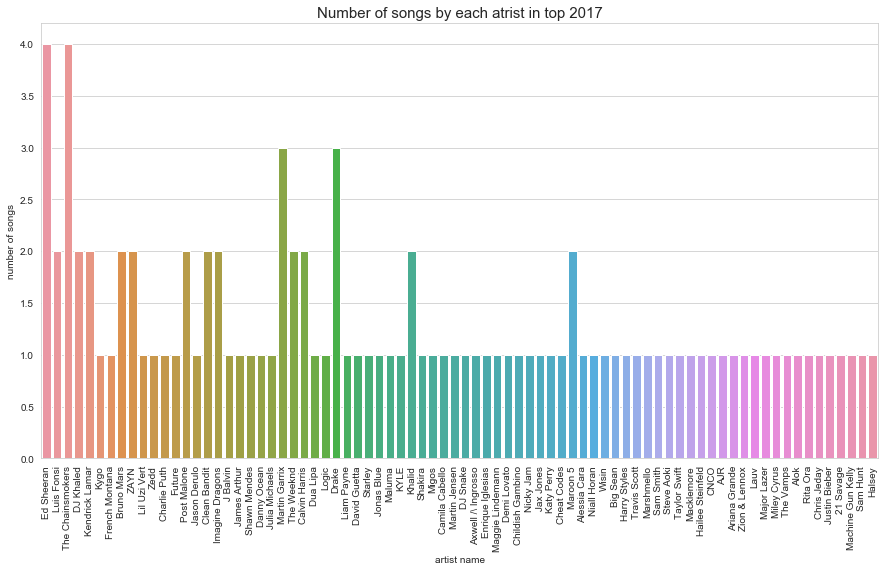

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(top2017["artists"])
plt.xticks(rotation=90)
plt.title("Number of songs by each atrist in top 2017", fontsize=15)
plt.ylabel("number of songs", fontsize=10)
plt.xlabel("artist name", fontsize=10)
plt.show()

The highest number of songs in the top 2017 is by "Ed Sheeran" and "The Chainsmokers". Both have four songs in a top chart. Another two artists "Martin Garrix" and "Drake" have three songs in the chart and 12 other artists have two songs in this top chart.

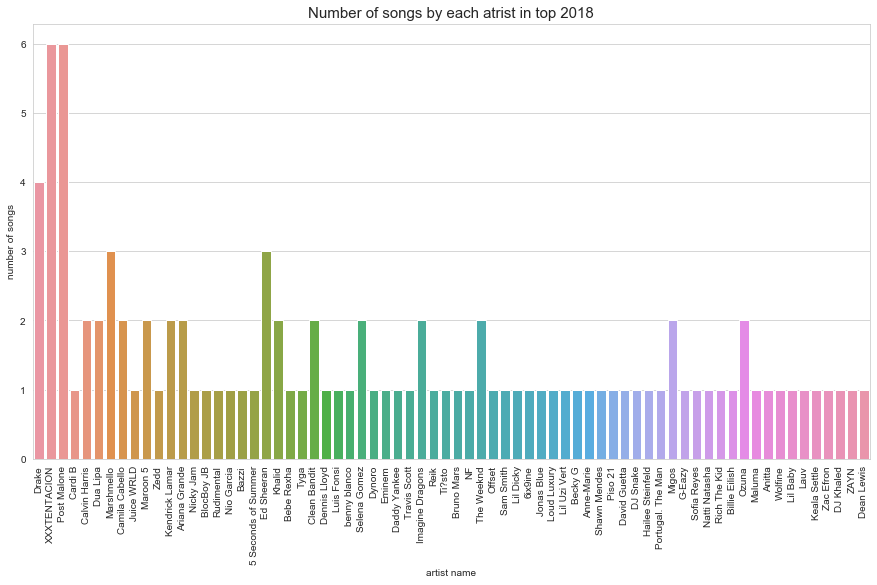

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(top2018["artists"])
plt.xticks(rotation=90)
plt.title("Number of songs by each atrist in top 2018", fontsize=15)
plt.ylabel("number of songs", fontsize=10)
plt.xlabel("artist name", fontsize=10)
plt.show()

Similar to the previous plot two artists "Post Malone" and "XXXTENTACION" have the highest number of top songs. These two artists have 6 songs each. Another high number is by artist "Drake", who also was seen in the top 2017 chart. In these dataset artist has four top songs. The artist "Ed Sheeran" is in this top chart with three top songs as well whereas "The Chainsmokers" is not in chat anymore instead the "Marshmello" has in comparison to top 2017 datases has two more top songs. Almost the same number of artists with two songs is in these dataset as well. 

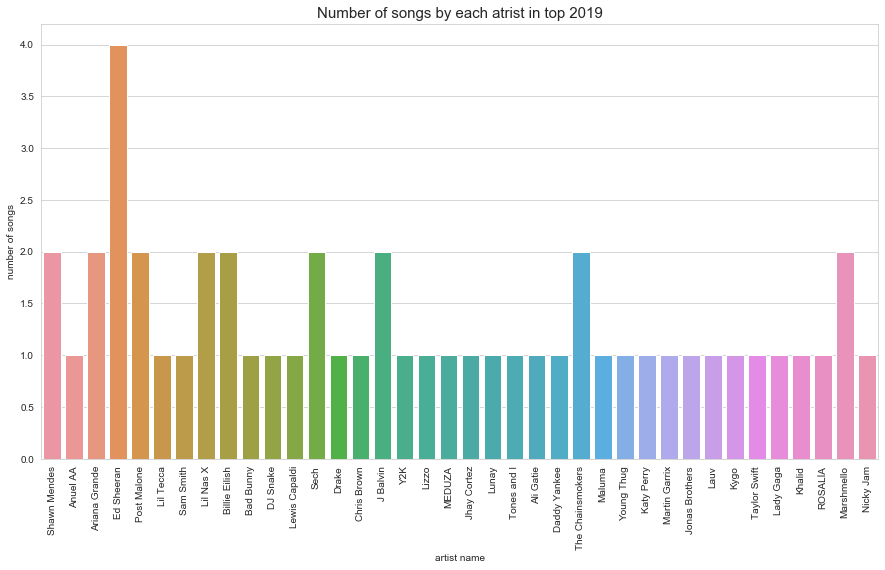

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(top2019["artists"])
plt.xticks(rotation=90)
plt.title("Number of songs by each atrist in top 2019", fontsize=15)
plt.ylabel("number of songs", fontsize=10)
plt.xlabel("artist name", fontsize=10)
plt.show()

In the top songs dataset from 2019, we can see artist "Ed Sheeran" again. Artist has three songs, which is the highest number in these datasets. Nine other artists have two songs and some of them were already to see in the previous datasets like "The Chainsmokers", "Marshmello" but also an artist like "Billie Eilish" and "Ariana Grande".

It also needs to be noticed that some artists were in all top charts. For example, the artist "Drake" was not only popular from 2017 till 2019 but also has more top songs that all other artists in some of the datasets. Similar to the artist "Drake" is the artist "Ed Sheeran". In the next, we will join all datasets together to see overall distribution.

#### 2. Show overall shares of artists

In [33]:
# concatenate all datasets together 
frames = [top2017, top2018, top2019]
top_all = pd.concat(frames)

In [24]:
# for later analysis
top_all_data = top_all.drop_duplicates(subset ="name", 
                     keep = False)
top_all

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity,Genre
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1.0,moderate,1.0,NaN
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1.0,moderate,1.0,NaN
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1.0,very fast,1.0,NaN
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1.0,moderate,0.0,NaN
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1.0,moderate,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,One Thing Right,Marshmello,0.660,0.620,NaN,-2.000,NaN,0.0500,0.0700,NaN,0.5800,0.440,88.000,182000.0,NaN,NaN,NaN,NaN,brostep
46,Te Robaré,Nicky Jam,0.670,0.750,NaN,-4.000,NaN,0.0600,0.2400,NaN,0.0800,0.800,176.000,202000.0,NaN,NaN,NaN,NaN,latin
47,Happier,Marshmello,0.690,0.790,NaN,-3.000,NaN,0.0500,0.1900,NaN,0.1700,0.670,100.000,214000.0,NaN,NaN,NaN,NaN,brostep
48,Call You Mine,The Chainsmokers,0.590,0.700,NaN,-6.000,NaN,0.0300,0.2300,NaN,0.4100,0.500,104.000,218000.0,NaN,NaN,NaN,NaN,edm


In [25]:
# take only the first three columns 
top_artist = top_all[top_all.columns[:2]]
top_artist = top_artist.drop("name", axis=1)
top_artist

,artists
0,Ed Sheeran
1,Luis Fonsi
2,Luis Fonsi
3,The Chainsmokers
4,DJ Khaled
...,...
45,Marshmello
46,Nicky Jam
47,Marshmello
48,The Chainsmokers


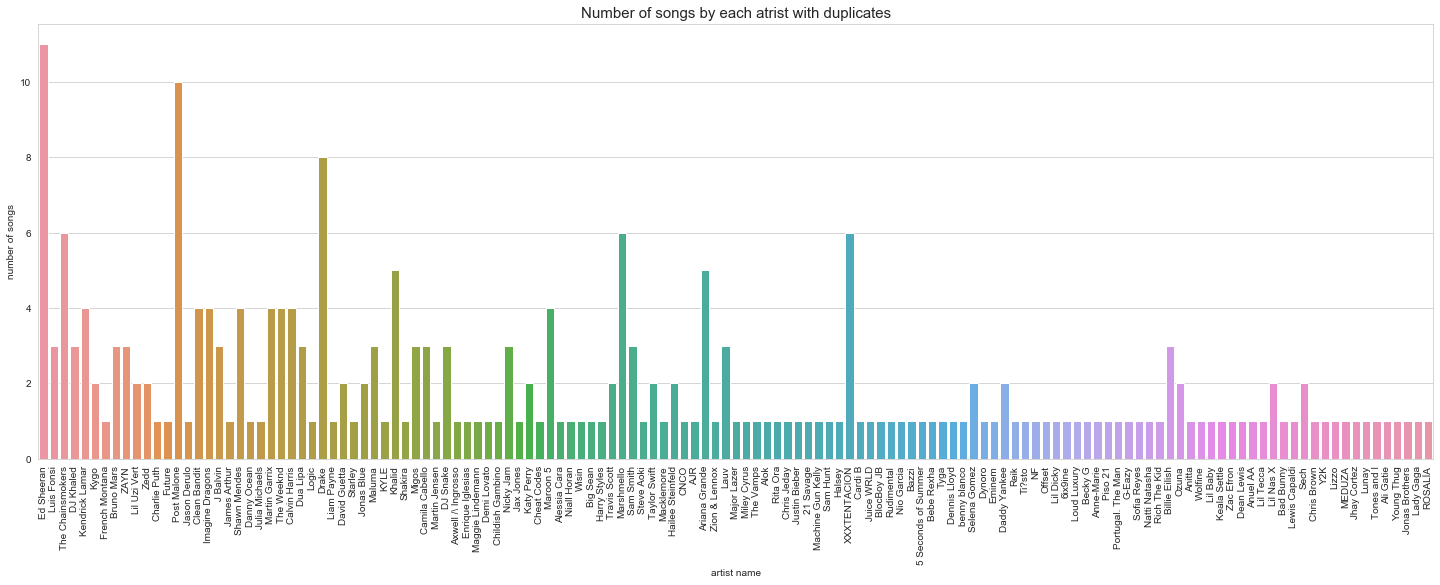

In [26]:
plt.figure(figsize=(25,8))
sns.countplot(top_artist["artists"])
plt.xticks(rotation=90)
plt.title("Number of songs by each atrist with duplicates", fontsize=15)
plt.ylabel("number of songs", fontsize=10)
plt.xlabel("artist name", fontsize=10)
plt.show()

In [27]:
# select artist with more than one song
most_songs_artsts = DataFrame(top_artist.groupby(top_artist.columns.tolist(),as_index=False).size(),columns=['songs_number'])
most_songs_artsts = most_songs_artsts.reset_index()
most_songs_artsts = most_songs_artsts[most_songs_artsts.songs_number > 1]
most_songs_artsts

,artists,songs_number
10,Ariana Grande,5
17,Billie Eilish,3
19,Bruno Mars,3
21,Calvin Harris,4
22,Camila Cabello,3
29,Clean Bandit,4
30,DJ Khaled,3
31,DJ Snake,3
32,Daddy Yankee,2
34,David Guetta,2


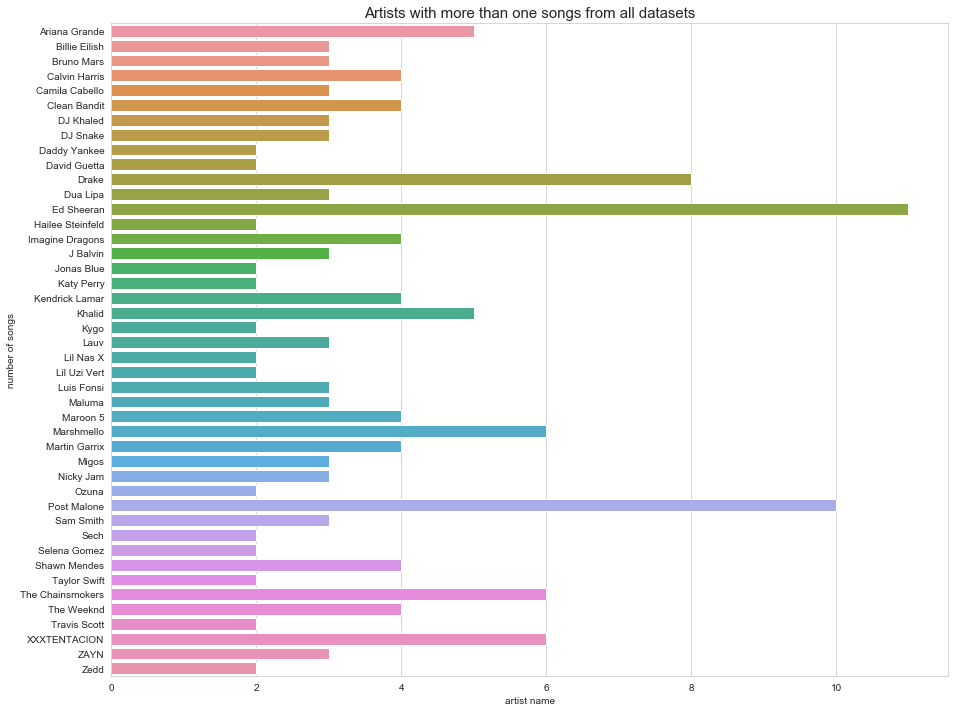

In [28]:
plt.figure(figsize=(15,12))

tips = sns.load_dataset("tips")
ax = sns.barplot( x="songs_number",y="artists", data=most_songs_artsts)

plt.title("Artists with more than one songs from all datasets", fontsize=15)
plt.ylabel("number of songs", fontsize=10)
plt.xlabel("artist name", fontsize=10)
plt.show()

From the representation, we can see multiple loved artists in 2017 till 2019. Representation contains duplicates, but for our analysis, we concentrate on the number of songs at all, so we can also see which artists were in all top charts. Specification on songs which contains all datasets we will analyze belove. 
The most successful artist with 11 songs though all datasets is "Ed Sheeran" followed by "Post Malone" with 10 songs and by singer "Drake" who has 8 songs. In the next wee will take a closer look at some of the musicians and analyze why the songs were topmost over three years and how they distinguish from all other top songs.

In [51]:
temp2017 = top2017[top2017.artists.isin(["Drake"])]
temp2017

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
36,Passionfruit,Drake,0.809,0.463,11.0,-11.377,1.0,0.0396,0.25600,0.08500,0.109,0.364,111.980,298941.0,4.0,1,fast,1
51,Fake Love,Drake,0.927,0.488,9.0,-9.433,0.0,0.4200,0.10800,0.00000,0.196,0.605,133.987,210937.0,4.0,1,fast,1
54,One Dance,Drake,0.791,0.619,1.0,-5.886,1.0,0.0532,0.00784,0.00423,0.351,0.371,103.989,173987.0,4.0,1,moderate,1


In [50]:
temp2018 = top2018[top2018.artists.isin(["Drake"])]
temp2018

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
4,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0
12,Nice For What,Drake,0.586,0.909,8.0,-6.474,1.0,0.0705,0.0891,0.000109,0.119,0.757,93.394,210747.0,4.0
61,Nonstop,Drake,0.912,0.412,7.0,-8.074,1.0,0.1240,0.0164,0.013000,0.104,0.422,154.983,238614.0,4.0


In [49]:
temp2019 = top2019[top2019.artists.isin(["Drake"])]
temp2019

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101.0,0.5,0.83,-4.0,0.12,0.1,205000.0,0.1,0.05


#### 3. Analyze most loved artists songs  
For better analyse we will split artists into groups.
 * 1. "Ed Sheeran", "Post Malone" and "Drake"
 * 2. "Ariana Grande", "Khalib", "Marshmello", "The Chainsmokers" and "XXXTENTACION"
 * 3. "The Weeknd", "Shawn Mendes", "Martin Garrix", "Maroon 5", "Kendrick Lamar", "Imagine Dragons", "Calvin Harris" and "Clean Bandit"
 * 4. "ZAYN", "Sam Smith", "Nick Jam", "Migos", "Maluma", "Luis Fonsi", "Lauv", "J Balvin", "Dua Lipa", "DJ Snake", "DJ Khaled", "Camila Cabello", "Bruno Mars" and "Billie Eilish"
 * 5 all other artists

#### Firts group:  "Ed Sheeran", "Post Malone" and "Drake"

In [29]:
list_of_values = ["Ed Sheeran", "Post Malone", "Drake"]
group1= top_all_data[top_all_data['artists'].isin(list_of_values)]
group1 = group1.drop(["mode", "instrumentalness","time_signature",
            "dancebility_new", "tempo_rate", "popularity","Genre", "key"], axis=1)
group1

,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms
17,Castle on the Hill,Ed Sheeran,0.461,0.834,-4.868,0.0989,0.02320,0.140,0.471,135.007,261154.0
26,Galway Girl,Ed Sheeran,0.624,0.876,-3.374,0.1000,0.07350,0.327,0.781,99.943,170827.0
36,Passionfruit,Drake,0.809,0.463,-11.377,0.0396,0.25600,0.109,0.364,111.980,298941.0
37,rockstar,Post Malone,0.577,0.522,-6.594,0.0984,0.13000,0.142,0.119,159.772,218320.0
51,Fake Love,Drake,0.927,0.488,-9.433,0.4200,0.10800,0.196,0.605,133.987,210937.0
54,One Dance,Drake,0.791,0.619,-5.886,0.0532,0.00784,0.351,0.371,103.989,173987.0
0,God's Plan,Drake,0.754,0.449,-9.211,0.1090,0.03320,0.552,0.357,77.169,198973.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,-6.090,0.0898,0.11700,0.131,0.140,159.847,218147.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,-8.011,0.1170,0.58000,0.112,0.439,140.124,221440.0
4,In My Feelings,Drake,0.835,0.626,-5.833,0.1250,0.05890,0.396,0.350,91.030,217925.0


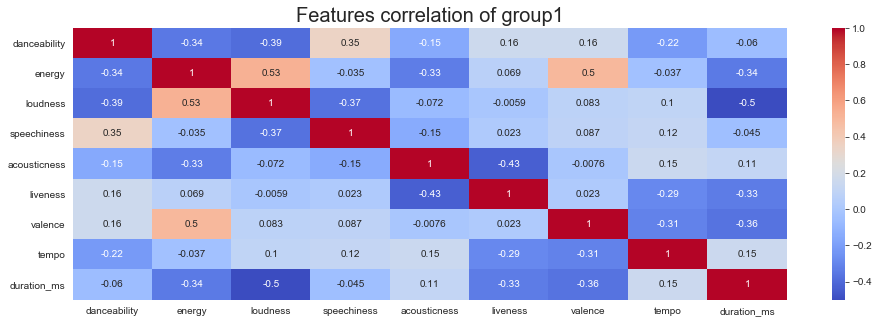

In [30]:
numeric = group1[["danceability","energy", "loudness", "speechiness",
                 "acousticness", "liveness","valence", "tempo","duration_ms"]]
plt.figure(figsize = (16,5))
sns.heatmap(numeric.corr(), cmap="coolwarm", annot=True).set_title("Features correlation of group1",
                                                                   fontsize=20);

From the heat map of feature correlation from group 1 we already can notice some differences. Our earlier analysis showed almost all of the highly correlated features represented here, accept the correlation between speechiness and danceability. These in comparison to our previous heat maps has value by 0.35 which is almost four times higher than the average value where it was lying by ca. 0.08.

In [31]:
drake = group1[group1.artists == "Drake"]
edSheeran = group1[group1.artists == "Ed Sheeran"]
postMalone = group1[group1.artists == "Post Malone"]

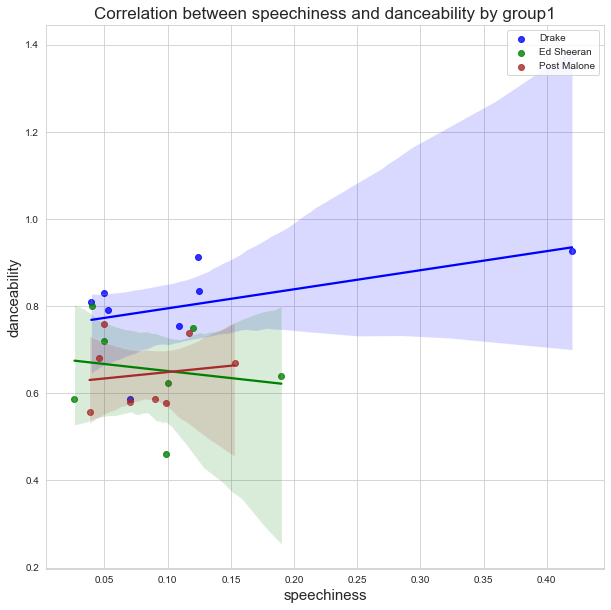

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X_axi',fontsize=15);
ax.set_ylabel('Y_axis',fontsize=15);
sns.regplot(data = drake, x = "speechiness", y ="danceability", color = "blue", label = "Drake").set_title('Correlation between speechiness and danceability by group1', fontsize = 17)
sns.regplot(data = edSheeran, x = "speechiness", y ="danceability", color = "green", label = "Ed Sheeran")
sns.regplot(data = postMalone, x = "speechiness", y ="danceability", color = "brown", label = "Post Malone")
plt.legend();

The distribution of highly correlated features shows that almost all songs have distribution by speechiness between 0.03 and 0.13 and danceability between 0.55 and 0.82.

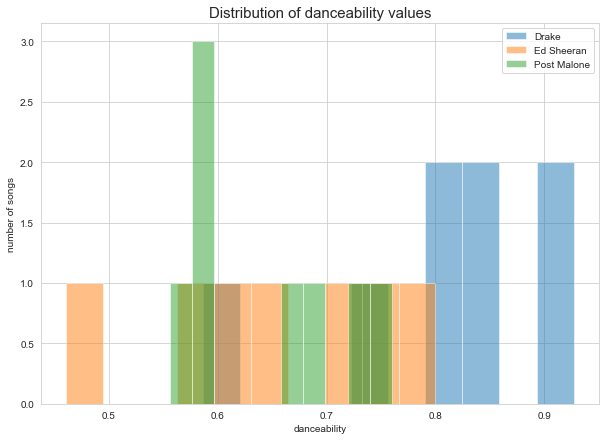

In [311]:
# Show distribution of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.danceability, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.danceability, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.danceability, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("danceability")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of danceability values', fontsize =15)
plt.show()

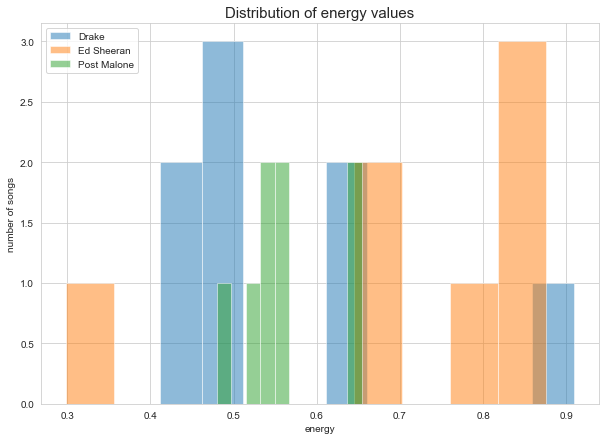

In [312]:
# Show energy of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.energy, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.energy, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.energy, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("energy")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of energy values', fontsize =15)
plt.show()

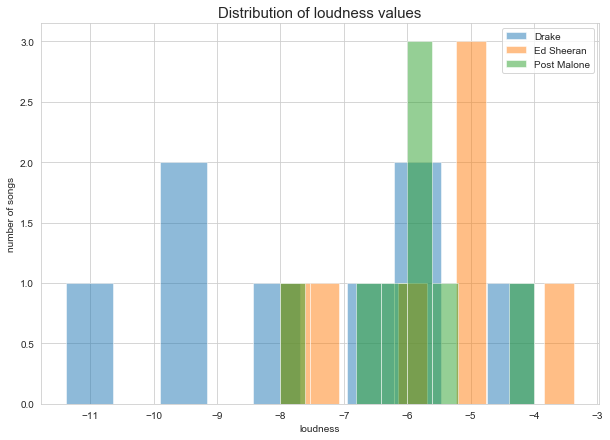

In [313]:
# Show energy of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.loudness, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.loudness, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.loudness, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("loudness")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of loudness values', fontsize =15)
plt.show()

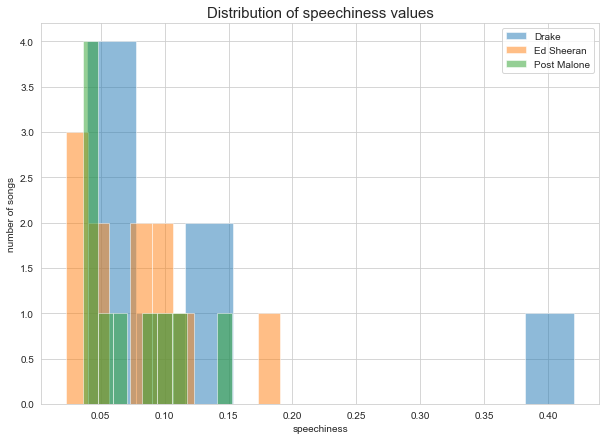

In [241]:
# Show energy of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.speechiness, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.speechiness, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.speechiness, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("speechiness")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of speechiness values', fontsize =15)
plt.show()

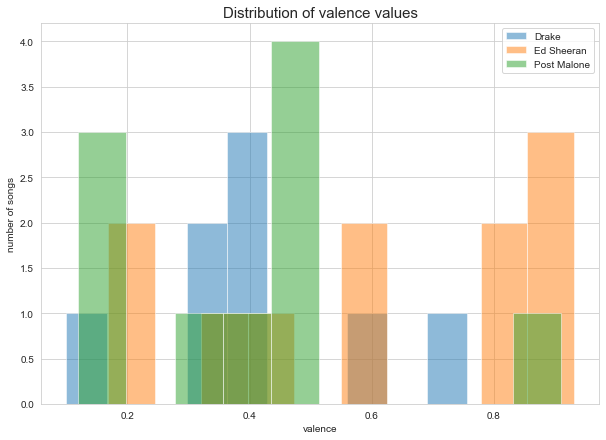

In [242]:
# Show energy of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.valence, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.valence, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.valence, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("valence")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of valence values', fontsize =15)
plt.show()

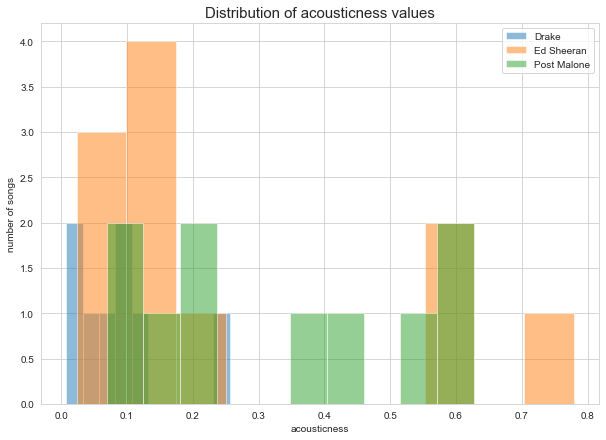

In [243]:
# Show energy of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.acousticness, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.acousticness, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.acousticness, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("acousticness")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of acousticness values', fontsize =15)
plt.show()

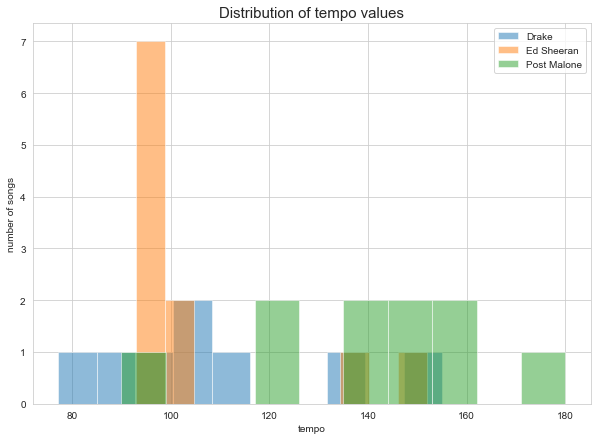

In [244]:
# Show energy of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.tempo, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.tempo, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.tempo, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("tempo")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of tempo values', fontsize =15)
plt.show()

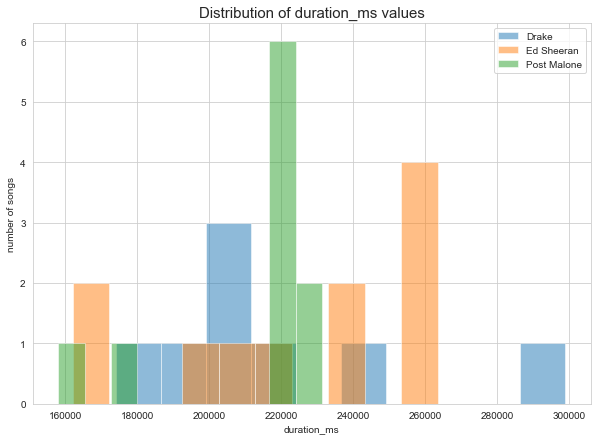

In [245]:
# Show energy of danceability values
plt.figure(figsize=(10,7))
plt.hist(drake.duration_ms, stacked=True, alpha=0.5, label = "Drake")
plt.hist(edSheeran.duration_ms, stacked=True, alpha=0.5, label = "Ed Sheeran")
plt.hist(postMalone.duration_ms, stacked=True, alpha=0.5, label = "Post Malone")
plt.xlabel("duration_ms")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of duration_ms values', fontsize =15)
plt.show()